In [1]:
import matplotlib.pyplot as plt
import numpy as np
from roots import RootFinder

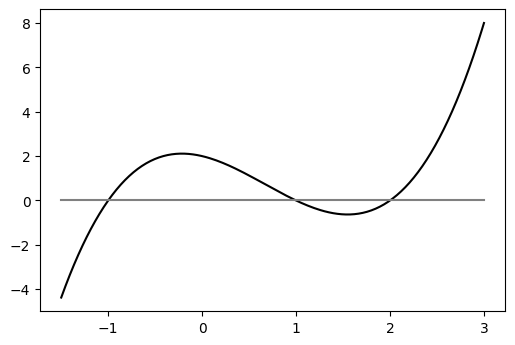

In [2]:
def f(x):
    return 2-x-2*x**2 + x**3
    # return x**6 - 6*x**5 + 8*x**4 + 10*x**3 - 21*x**2 - 4*x + 12

def df(x):
    return 3*x**2-4*x-1
    # return -4-42*x + 30*x**2 + 32*x**3 - 30*x**4 + 6*x**5

x_axis = np.linspace(-1.5,3,200)
plt.figure(dpi=100)
plt.plot(x_axis,[f(x) for x in x_axis],color='black')
plt.plot(x_axis,[0 for x in x_axis],color='gray')
plt.show()

In [3]:
rf = RootFinder()
rf.fit(f=f,x0=-2,x1=0.5,tolerance=0.00001,method='bisection',df=df)

-1.0000057220458984

In [4]:
rf.print_table()

,n_iter,root,error,f(x)
0,1,-0.75000,1.66667,1.20312
1,2,-1.37500,0.45455,-3.00586
2,3,-1.06250,0.29412,-0.39478
3,4,-0.90625,0.17241,0.51938
4,5,-0.98438,0.07937,0.09253
5,6,-1.02344,0.03817,-0.14338
6,7,-1.00391,0.01946,-0.02351
7,8,-0.99414,0.00982,0.03498
8,9,-0.99902,0.00489,0.00585
9,10,-1.00146,0.00244,-0.00880


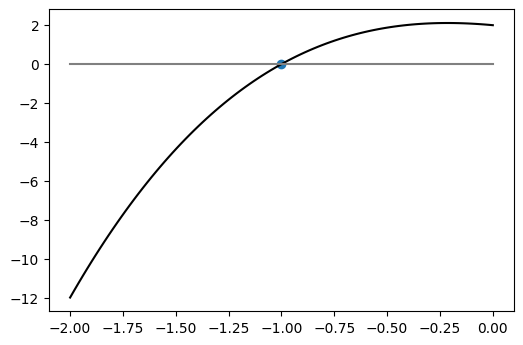

In [5]:
rf.plot(window=1)

# Explorar regiones

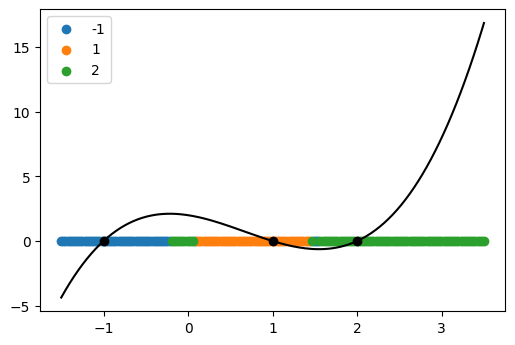

In [46]:
a,b = -1.5,3.5

seeds = np.linspace(a,b,num=200)
roots = np.array([-1,1,2])
zones = [[] for x in roots]

for x0 in seeds:
    rf = RootFinder()
    root = rf.fit(f=f,x0=x0,tolerance=0.00001,method='newton',df=df)
    if np.where(np.abs(roots-root)<0.0001)[0].shape[0] == 1:
        idx = np.where(np.abs(roots-root)<0.0001)[0][0]
        zones[idx].append(x0)

plt.figure(dpi=100)
x_axis = np.linspace(a,b,200)
for j,zone in enumerate(zones):
    plt.scatter(zone,[0 for x in zone],label=str(roots[j]))
plt.plot(x_axis,[f(x) for x in x_axis],color='black')
plt.scatter(roots,[0 for x in roots],color='black')
plt.legend(loc='best')
plt.show()
